In [32]:
# %reload_ext autoreload
# %load_ext autoreload
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'/home/aw1223/ip/agile')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam/neural_lam')

import torch
from sdk.models.graph_lam import GraphLAM_DataProcessor
from sdk.models.graph_lam import GraphLam_Model
from neural_lam.weather_dataset import WeatherDataset

%cd /home/aw1223/ip/worktree_a/imports/neural-lam
dataset='meps_example'

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    dataset,
                    pred_length=1,
                    split='test',
                    subsample_step=1,
                ),
                batch_size=1,
                shuffle=False,
                num_workers=1,
            )

data_processor = GraphLAM_DataProcessor(dataset,graph='1level')

graph_data = data_processor.preprocess_inputs(eval_loader,n_nodes = None)
# print(graph_data)

feature_shape_dict = graph_data['shapes']
edge_index_dict = graph_data['edges']
# print(edge_index_dict)
%cd -

model = GraphLam_Model(feature_shape_dict,edge_index_dict)
# #Change data to a list of inputs
# print(graph_data['features'])

# print('grid_features',graph_data['features']['grid_features'].shape)
# print('mesh_static_features',graph_data['features']['mesh_static_features'].shape)
# print('g2m_features',graph_data['features']['g2m_features'].shape)
# print('m2m_features',graph_data['features']['m2m_features'].shape)
# print('m2g_features',graph_data['features']['m2g_features'].shape)


grid_features = graph_data['features']['grid_features']
mesh_static_features = graph_data['features']['mesh_static_features']
g2m_features = graph_data['features']['g2m_features']
m2m_features = graph_data['features']['m2m_features']
m2g_features = graph_data['features']['m2g_features']
print('grid_features',grid_features.shape)
print('mesh_static_features',mesh_static_features.shape)
print('g2m_features',g2m_features.shape)
print('m2m_features',m2m_features.shape)
print('m2g_features',m2g_features.shape)



g2m_edge_index = graph_data['edges']['g2m_edge_index']
m2m_edge_index = graph_data['edges']['m2m_edge_index']
m2g_edge_index = graph_data['edges']['m2g_edge_index']

# External inputs {'g2m_embedder_input_0': None, 'g2m_gnn_input_2': None, 'grid_embedder_input_0': None, 'm2g_embedder_input_0': None, 'm2g_gnn_input_2': None, 'm2m_embedder_input_0': None, 'mesh_embedder_input_0': None, 'processor_input_2': None}
#Must sort inputs
inputs = [g2m_features,g2m_edge_index,grid_features,m2g_features,m2g_edge_index,m2m_features,mesh_static_features,m2m_edge_index]
# features = [grid_features,mesh_static_features,g2m_features,m2m_features,m2g_features]
# edges = [g2m_edge_index,m2m_edge_index,m2g_edge_index]
# inputs = [features,edges]
print('inputs')
print(inputs)
# out = model(grid_features =grid_features ,mesh_static_features=mesh_static_features,g2m_features=g2m_features,m2m_features=m2m_features,m2g_features=m2g_features)
out = model(*inputs)
# out = model(*features,*edges)
print(out)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/aw1223/ip/worktree_a/imports/neural-lam
prev_state torch.Size([63784, 17])
prev_prev_state torch.Size([63784, 17])
batch_static_features torch.Size([63784, 1])
forcing torch.Size([63784, 15])
self.grid_static_features torch.Size([63784, 4])
gridfeautes shape torch.Size([63784, 54])
/home/aw1223/ip/agile/sdk
m2m_edge_index tensor([[   0,    0,    0,  ..., 6560, 6560, 6560],
        [  81,    1,   82,  ..., 6479, 6559, 6478]])
g2m_edge_index tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  6560,  6560,  6560]])
m2g_edge_index tensor([[    0,     0,     0,  ...,  6560,  6560,  6560],
        [ 6561,  6562,  6563,  ..., 70342, 70343, 70344]])
Edges in subgraphs: m2m=51520, g2m=100656, m2g=255136
Loaded graph with 70345 nodes (63784 grid, 6561 mesh)
grid_features torch.Size([63784, 54])
mesh_static_features torch.Size([6561, 2])
g2m_features torch.Size(

inputs [tensor([[ 0.5000, -0.3319, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.3933,  0.1218, -0.3739],
        ...,
        [ 0.3933, -0.1218,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.5000,  0.3319,  0.3739]]), tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  6560,  6560,  6560]]), tensor([[ 0.3498, -0.4341,  0.4681,  ..., -0.9964,  0.0135,  1.0000],
        [ 0.3559, -0.4377,  0.3661,  ..., -0.9964,  0.0134,  1.0000],
        [ 0.3520, -0.4186,  0.2826,  ..., -0.9964,  0.0139,  1.0000],
        ...,
        [-0.6038,  1.2037, -0.6171,  ...,  1.0000,  0.1689,  1.0000],
        [-0.1201,  1.2032, -0.4780,  ...,  1.0000,  0.1180,  1.0000],
        [-0.0468,  1.1377, -0.3064,  ...,  1.0000,  0.1094,  1.0000]]), tensor([[ 0.5000,  0.3319,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.3933, -0.1218,  0.3739],
        ...,
        [ 0.3933,  0.1218, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
    

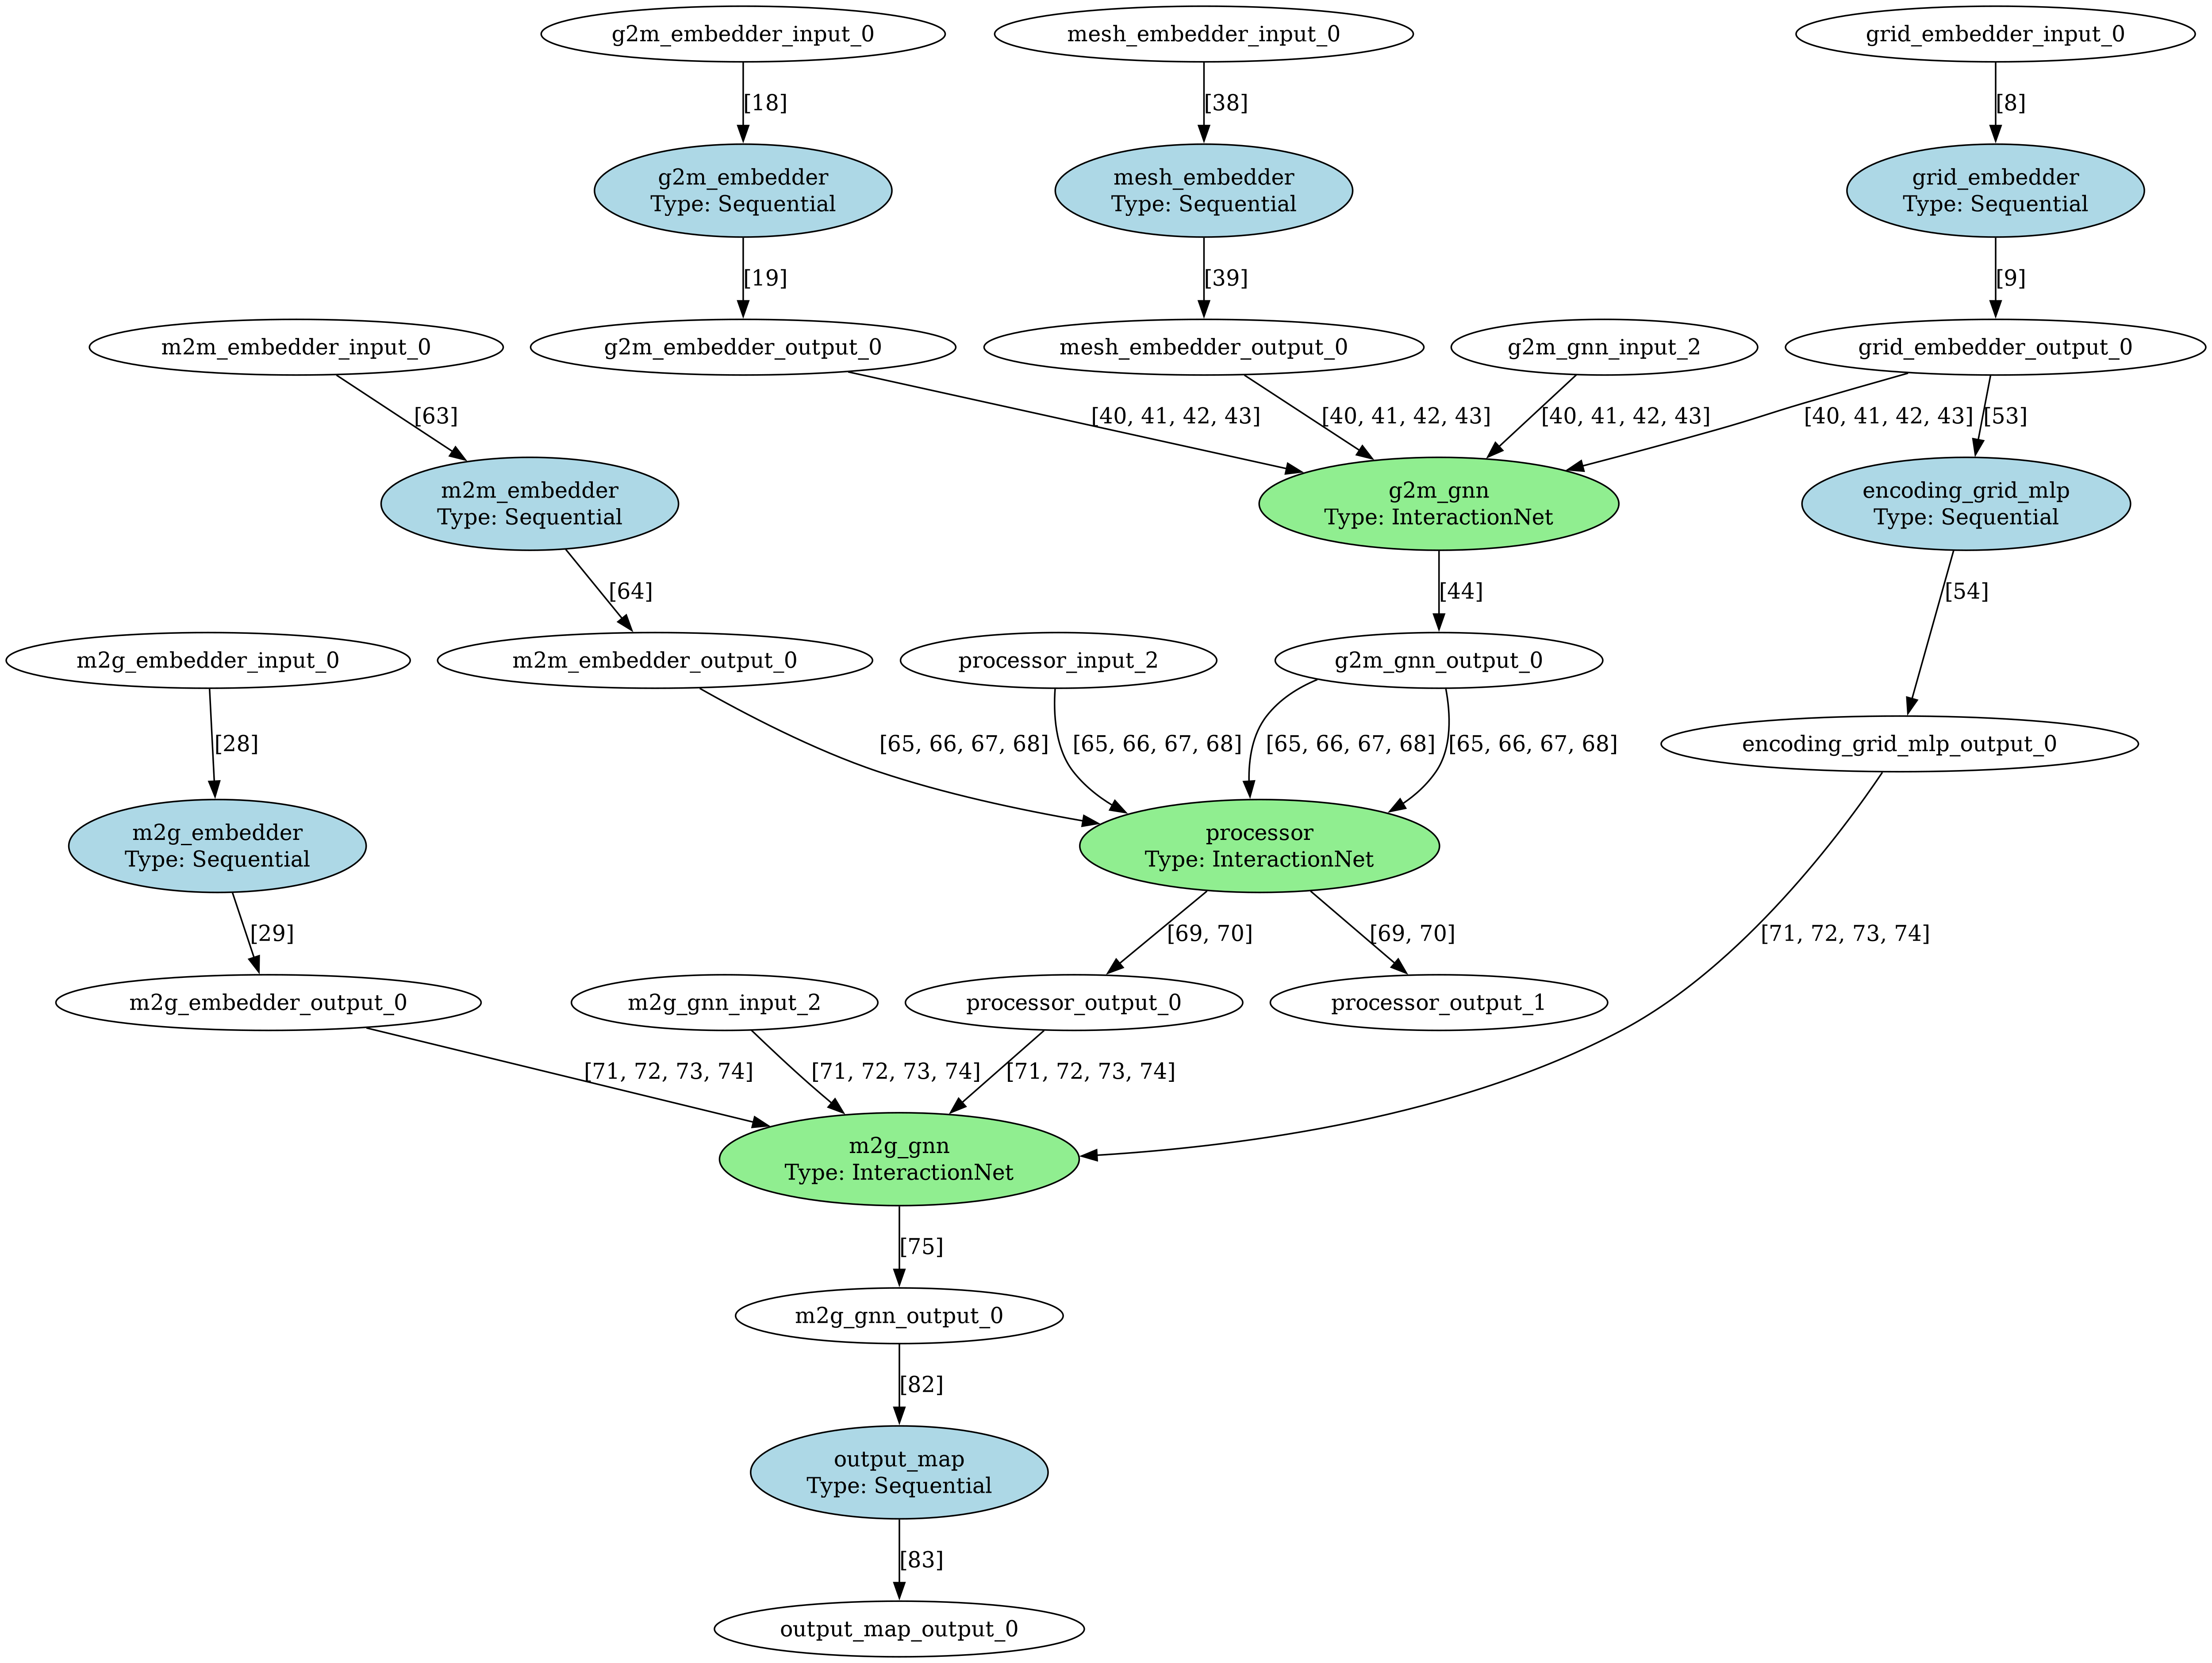

External inputs {'g2m_embedder_input_0', 'm2g_embedder_input_0', 'mesh_embedder_input_0', 'processor_input_2', 'g2m_gnn_input_2', 'm2m_embedder_input_0', 'grid_embedder_input_0', 'm2g_gnn_input_2'}
8
External inputs {'g2m_embedder_input_0': None, 'm2g_embedder_input_0': None, 'mesh_embedder_input_0': None, 'processor_input_2': None, 'g2m_gnn_input_2': None, 'm2m_embedder_input_0': None, 'grid_embedder_input_0': None, 'm2g_gnn_input_2': None}
External inputs {'g2m_embedder_input_0': None, 'g2m_gnn_input_2': None, 'grid_embedder_input_0': None, 'm2g_embedder_input_0': None, 'm2g_gnn_input_2': None, 'm2m_embedder_input_0': None, 'mesh_embedder_input_0': None, 'processor_input_2': None}
key g2m_embedder_input_0
value tensor([[ 0.5000, -0.3319, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.3933,  0.1218, -0.3739],
        ...,
        [ 0.3933, -0.1218,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.5000,  0.3319,  0.3739]])
key g2m_gnn_input_2
value tensor([[ 6561,

7974it [00:00, 61453.93it/s]


Writing memory
name g2m_embedder
sub_module_name g2m_embedder
input_names ['g2m_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


12583it [00:00, 64898.63it/s]


name m2g_embedder
sub_module_name m2g_embedder
input_names ['m2g_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


31893it [00:00, 68901.38it/s]


name mesh_embedder
sub_module_name mesh_embedder
input_names ['mesh_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


821it [00:00, 68586.52it/s]


name m2m_embedder
sub_module_name m2m_embedder
input_names ['m2m_embedder_input_0']
node features
base_path /home/aw1223/ip/agile/hw/sim/layer_config/


6441it [00:00, 66700.36it/s]


name encoding_grid_mlp
item_name grid_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 63784, 'out_addr': 32665600}
Node attribute
item_name g2m_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['g2m_embedder_output_0'], 'input_order': [18], 'output_order': [19], 'module_type': 'Sequential', 'num_nodes': 100656, 'out_addr': 32211968}
item_name m2g_embedder
item_data {'input_names': ['m2g_embedder_input_0'], 'input_indices': [0], 'output_names': ['m2g_embedder_output_0'], 'input_order': [28], 'output_order': [29], 'module_type': 'Sequential', 'num_nodes': 255136, 'out_addr': 81645568}
item_name mesh_embedder
item_data {'input_names': ['mesh_embedder_input_0'], 'input_indices': [0], 'output_names': ['mesh_embedder_output_0'], 'input_order': [38], 'output_order': [39], 'module_typ

7974it [00:00, 65475.19it/s]


name g2m_gnn
item_name grid_embedder
item_data {'input_names': ['grid_embedder_input_0'], 'input_indices': [0], 'output_names': ['grid_embedder_output_0'], 'input_order': [8], 'output_order': [9], 'module_type': 'Sequential', 'num_nodes': 63784, 'out_addr': 32665600}
Node attribute
item_name g2m_embedder
item_data {'input_names': ['g2m_embedder_input_0'], 'input_indices': [0], 'output_names': ['g2m_embedder_output_0'], 'input_order': [18], 'output_order': [19], 'module_type': 'Sequential', 'num_nodes': 100656, 'out_addr': 32211968}
Edge attribute
item_name m2g_embedder
item_data {'input_names': ['m2g_embedder_input_0'], 'input_indices': [0], 'output_names': ['m2g_embedder_output_0'], 'input_order': [28], 'output_order': [29], 'module_type': 'Sequential', 'num_nodes': 255136, 'out_addr': 81645568}
item_name mesh_embedder
item_data {'input_names': ['mesh_embedder_input_0'], 'input_indices': [0], 'output_names': ['mesh_embedder_output_0'], 'input_order': [38], 'output_order': [39], 'modul

KeyError: 'meta'

In [33]:

from sdk.ample import Ample

ample = Ample()
print('inputs',inputs)
# model = GraphLam_Model(<parameters>)
model.to_device('ample',data=inputs)
#inputs.to_device('ample')# Change to this when time

# out = model(<input_graph>)